In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NAN)

In [7]:
df.isna().sum()/len(df)*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025053FA64C8>,
      dtype=object)

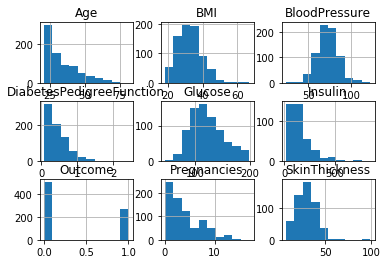

In [8]:
df.hist()

In [9]:
df['Glucose']=df['Glucose'].fillna(df['Glucose'].mean())

In [10]:
df.isna().sum()/len(df)*100

Pregnancies                  0.000000
Glucose                      0.000000
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [11]:
df['BloodPressure']=df['BloodPressure'].fillna(df['BloodPressure'].mean())

In [12]:
df.isna().sum()/len(df)*100

Pregnancies                  0.000000
Glucose                      0.000000
BloodPressure                0.000000
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [13]:
df['SkinThickness']=df['SkinThickness'].fillna(df['SkinThickness'].median())

In [14]:
df.isna().sum()/len(df)*100

Pregnancies                  0.000000
Glucose                      0.000000
BloodPressure                0.000000
SkinThickness                0.000000
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [15]:
df['Insulin']=df['Insulin'].fillna(df['Insulin'].median())

In [16]:
df.isna().sum()/len(df)*100

Pregnancies                 0.000000
Glucose                     0.000000
BloodPressure               0.000000
SkinThickness               0.000000
Insulin                     0.000000
BMI                         1.432292
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [17]:
df['BMI']=df['BMI'].fillna(df['BMI'].median())

In [18]:
df.isna().sum()/len(df)*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

## EDA

In [19]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

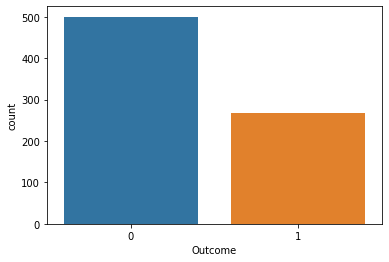

In [20]:
sns.countplot(df['Outcome'])

### From above chart we can say that our target variable is imbalanced

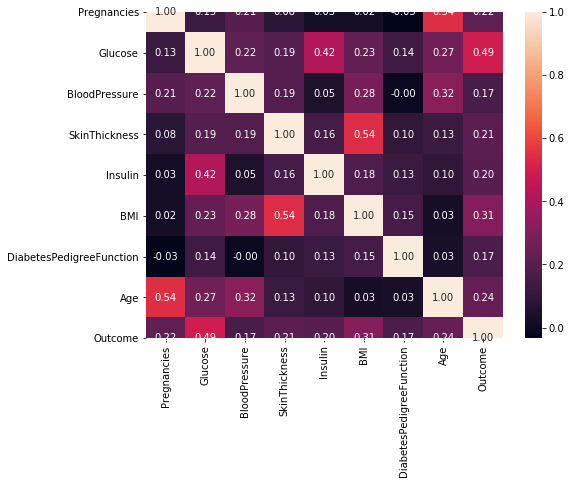

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

In [22]:
#sns.pairplot(data=df,hue='Outcome')

In [23]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


In [24]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [25]:
#Splitting data into train and test dataset

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [28]:
X_train.shape

(614, 8)

In [29]:
X_test.shape

(154, 8)

In [30]:
y_train.shape

(614,)

In [31]:
y_test.shape

(154,)

In [32]:
#Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc=StandardScaler()

In [35]:
X_train=sc.fit_transform(X_train)

In [36]:
X_test=sc.fit_transform(X_test)

In [37]:
#Model Building 

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)

In [40]:
from sklearn.metrics import classification_report,f1_score

In [41]:
print('Train Data')
print(classification_report(y_train,y_pred_train))
print('Test Data')
print(classification_report(y_test,y_pred_test))

Train Data
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       401
           1       0.75      0.69      0.72       213

    accuracy                           0.81       614
   macro avg       0.80      0.79      0.79       614
weighted avg       0.81      0.81      0.81       614

Test Data
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        99
           1       0.77      0.65      0.71        55

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



In [42]:
#Hyper paramter Tunning

In [43]:
#No use in this data right now

In [44]:
param_grid={
    'n_neighbors':np.arange(1,15),
    'weights':['uniform','distance'],
    'metric':['minkowski','euclidean','manhattan']
}

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
gridclf=GridSearchCV(clf,param_grid=param_grid,scoring='f1',cv=5,n_jobs=-1)
gridclf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [47]:
gridclf.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

In [48]:
gridclf.best_score_

0.6352918009397919

In [49]:
#Prediction

In [50]:
clf=KNeighborsClassifier(metric= 'manhattan', n_neighbors= 9, weights= 'uniform')
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
print('Train Data')
print(classification_report(y_train,y_pred_train))
print('Test Data')
print(classification_report(y_test,y_pred_test))

Train Data
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       401
           1       0.76      0.67      0.71       213

    accuracy                           0.81       614
   macro avg       0.79      0.78      0.78       614
weighted avg       0.81      0.81      0.81       614

Test Data
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        99
           1       0.78      0.64      0.70        55

    accuracy                           0.81       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



In [51]:
#2nd method

In [52]:
grid_train_pred=gridclf.predict(X_train)
grid_test_pred=gridclf.predict(X_test)

In [53]:
print('Train Data')
print(classification_report(y_train,grid_train_pred))
print('Test Data')
print(classification_report(y_test,grid_test_pred))

Train Data
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       401
           1       0.76      0.67      0.71       213

    accuracy                           0.81       614
   macro avg       0.79      0.78      0.78       614
weighted avg       0.81      0.81      0.81       614

Test Data
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        99
           1       0.78      0.64      0.70        55

    accuracy                           0.81       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



In [54]:
#3rdMethod

In [55]:
for i in range(1,15):
    clf=KNeighborsClassifier(n_neighbors= i)
    clf.fit(X_train,y_train)
    y_pred_train=clf.predict(X_train)
    y_pred_test=clf.predict(X_test)
    print({'k': i} )
    print('Train Data')
    print(f1_score(y_train,y_pred_train))
    print('Test Data')
    print(f1_score(y_test,y_pred_test))

{'k': 1}
Train Data
1.0
Test Data
0.6126126126126126
{'k': 2}
Train Data
0.6687500000000001
Test Data
0.5783132530120482
{'k': 3}
Train Data
0.7710843373493975
Test Data
0.7047619047619048
{'k': 4}
Train Data
0.6742209631728046
Test Data
0.6363636363636364
{'k': 5}
Train Data
0.7219512195121951
Test Data
0.7058823529411765
{'k': 6}
Train Data
0.6648351648351649
Test Data
0.6206896551724137
{'k': 7}
Train Data
0.6893203883495145
Test Data
0.6666666666666666
{'k': 8}
Train Data
0.6684350132625996
Test Data
0.6024096385542169
{'k': 9}
Train Data
0.6847290640394088
Test Data
0.6170212765957446
{'k': 10}
Train Data
0.6378378378378379
Test Data
0.5813953488372092
{'k': 11}
Train Data
0.6715328467153285
Test Data
0.7128712871287128
{'k': 12}
Train Data
0.6310160427807486
Test Data
0.6373626373626373
{'k': 13}
Train Data
0.6699751861042184
Test Data
0.693069306930693
{'k': 14}
Train Data
0.6469002695417789
Test Data
0.6666666666666666
